In [48]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140


In [140]:
data=pd.read_csv('Netflix Dataset.csv')
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Null value


In [50]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

## null rate

In [141]:
for i in data.columns:
    null_rate = data[i].isnull().sum() / len(data) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

Director null rate: 30.66%
Cast null rate: 9.22%
Country null rate: 6.51%
Release_Date null rate: 0.13%
Rating null rate: 0.09%


In [52]:
data.shape

(7789, 11)

In [53]:
data.size

85679

## Dealing with missing data
This is always scenario dependant, but in this case, I will:

    replace blank countries with the mode (most common) country
    I want to keep director as it could be interesting to look at a certain director's films
    I want to keep cast as it could be interesting to look at a certain cast's films


In [142]:
data['Country'] = data['Country'].fillna(data['Country'].mode()[0])
data['Cast'].replace(np.nan, 'No Data',inplace  = True)
data['Director'].replace(np.nan, 'No Data',inplace  = True)

In [143]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [144]:
data.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [145]:
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7770 non-null   object
 1   Category      7770 non-null   object
 2   Title         7770 non-null   object
 3   Director      7770 non-null   object
 4   Cast          7770 non-null   object
 5   Country       7770 non-null   object
 6   Release_Date  7770 non-null   object
 7   Rating        7770 non-null   object
 8   Duration      7770 non-null   object
 9   Type          7770 non-null   object
 10  Description   7770 non-null   object
dtypes: object(11)
memory usage: 728.4+ KB


In [147]:
data.shape

(7770, 11)

## Date and Time

In [148]:
data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [149]:
data["Release_Date"] = pd.to_datetime(data['Release_Date'])

data['month_added']=data['Release_Date'].dt.month
data['month_name_added']=data['Release_Date'].dt.month_name()
data['year_added'] = data['Release_Date'].dt.year
data.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,month_added,month_name_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016


In [150]:
data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description',
       'month_added', 'month_name_added', 'year_added'],
      dtype='object')

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7788
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Show_Id           7770 non-null   object        
 1   Category          7770 non-null   object        
 2   Title             7770 non-null   object        
 3   Director          7770 non-null   object        
 4   Cast              7770 non-null   object        
 5   Country           7770 non-null   object        
 6   Release_Date      7770 non-null   datetime64[ns]
 7   Rating            7770 non-null   object        
 8   Duration          7770 non-null   object        
 9   Type              7770 non-null   object        
 10  Description       7770 non-null   object        
 11  month_added       7770 non-null   int64         
 12  month_name_added  7770 non-null   object        
 13  year_added        7770 non-null   int64         
dtypes: datetime64[ns](1), in

# Visualization
Where possible, I'll use the Netflix brand colours

https://brand.netflix.com/en/assets/brand-symbol/

Using a consistent color palette is a great way to give your work credibility. It looks professional, and keeps the reader engaged.

It's an easy-to-implement tip that really helps.

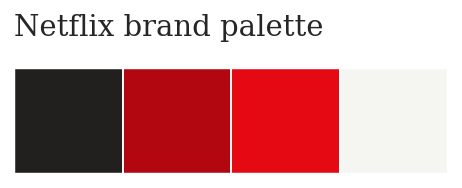

In [152]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()



# Content - Let's explore

Now we've seen how Netflix came to dominate our TV screens, let's have a look at the content they offer...


In [153]:
# For viz: Ratio of Movies & TV shows

x=data.groupby(['Category'])['Category'].count()
y=len(data)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
mf_ratio

Category,Movie,TV Show
Category,0.69,0.31


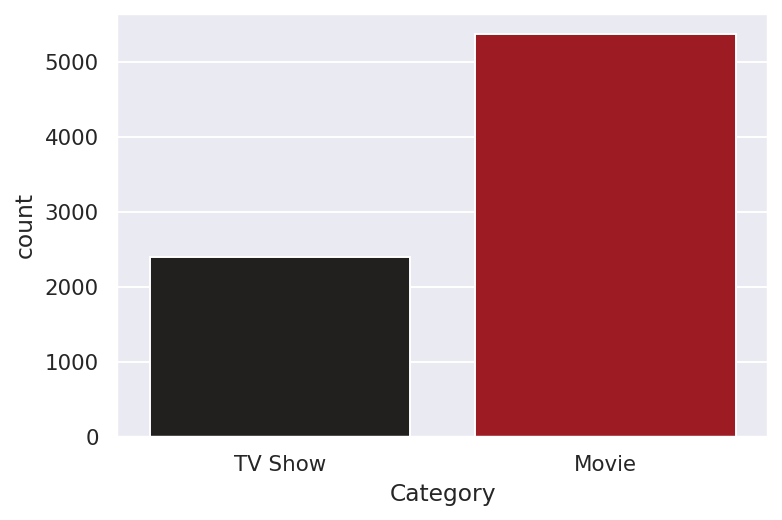

In [154]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Category", data=data, palette=sns.blend_palette(['#221f1f', '#b20710'],2))


In [155]:
sns.blend_palette(['#221f1f', '#b20710'])

[(0.13333333333333333, 0.12156862745098039, 0.12156862745098039),
 (0.24627450980392157, 0.10274509803921568, 0.10980392156862745),
 (0.35921568627450984, 0.08392156862745098, 0.09803921568627451),
 (0.47215686274509805, 0.06509803921568627, 0.08627450980392157),
 (0.5850980392156863, 0.04627450980392156, 0.07450980392156863),
 (0.6980392156862745, 0.027450980392156862, 0.06274509803921569)]


By Country

So we now know there are much more movies than TV shows on Netflix (which surprises me!).

What about if we look at content by country?

I would imagine that the USA will have the most content. I wonder how my country, the UK, will compare?


In [156]:
# Quick feature engineering

# Helper column for various plots
data['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
data['first_country'] = data['Country'].apply(lambda x: x.split(",")[0])
data['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

data['target_ages'] = data['Rating'].replace(ratings_ages)
data['target_ages'].unique()

# Genre

data['genre'] = data['Type'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length

data['first_country'].replace('United States', 'USA', inplace=True)
data['first_country'].replace('United Kingdom', 'UK',inplace=True)
data['first_country'].replace('South Korea', 'S. Korea',inplace=True)

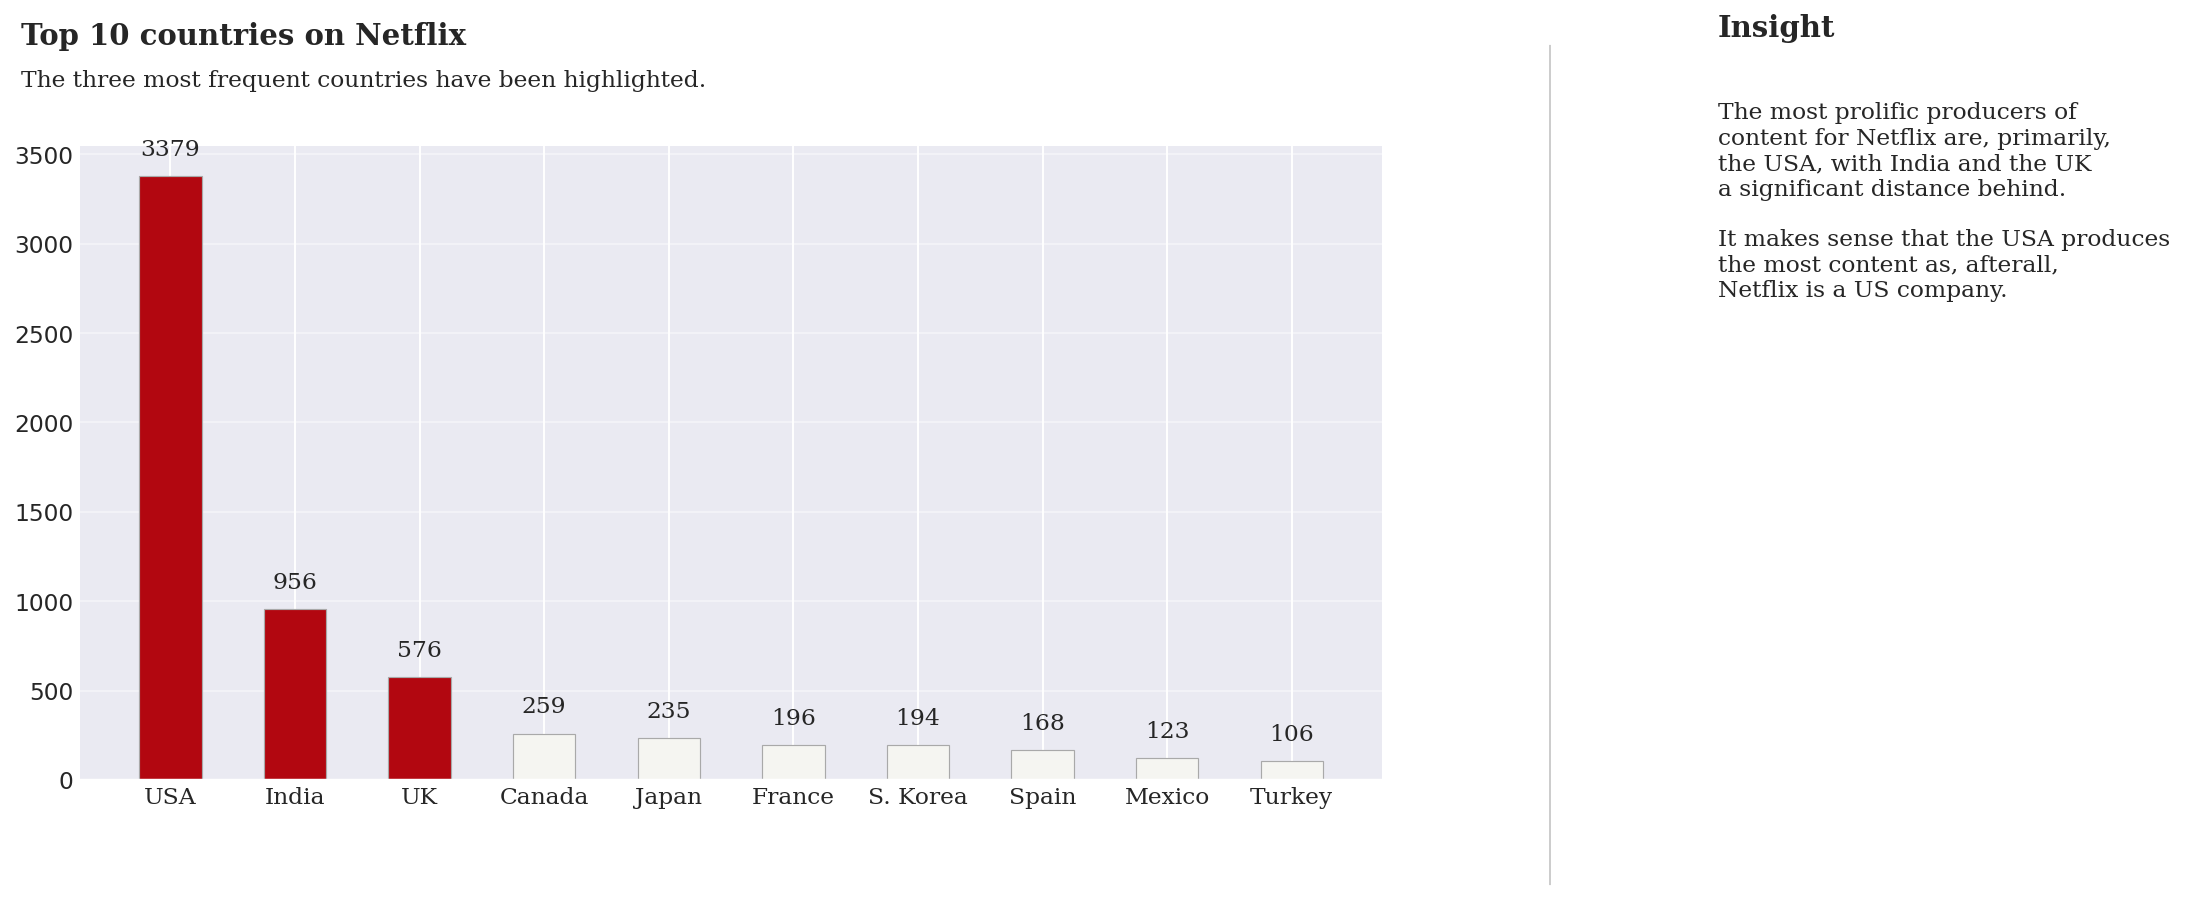

In [157]:
df = data.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(df.index, df, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in df.index:
    ax.annotate(f"{df[i]}", 
                   xy=(i, df[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(df.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()



As predicted, the USA dominates.

The UK is a top contender too, but still some way behind India.

How does content by country vary?


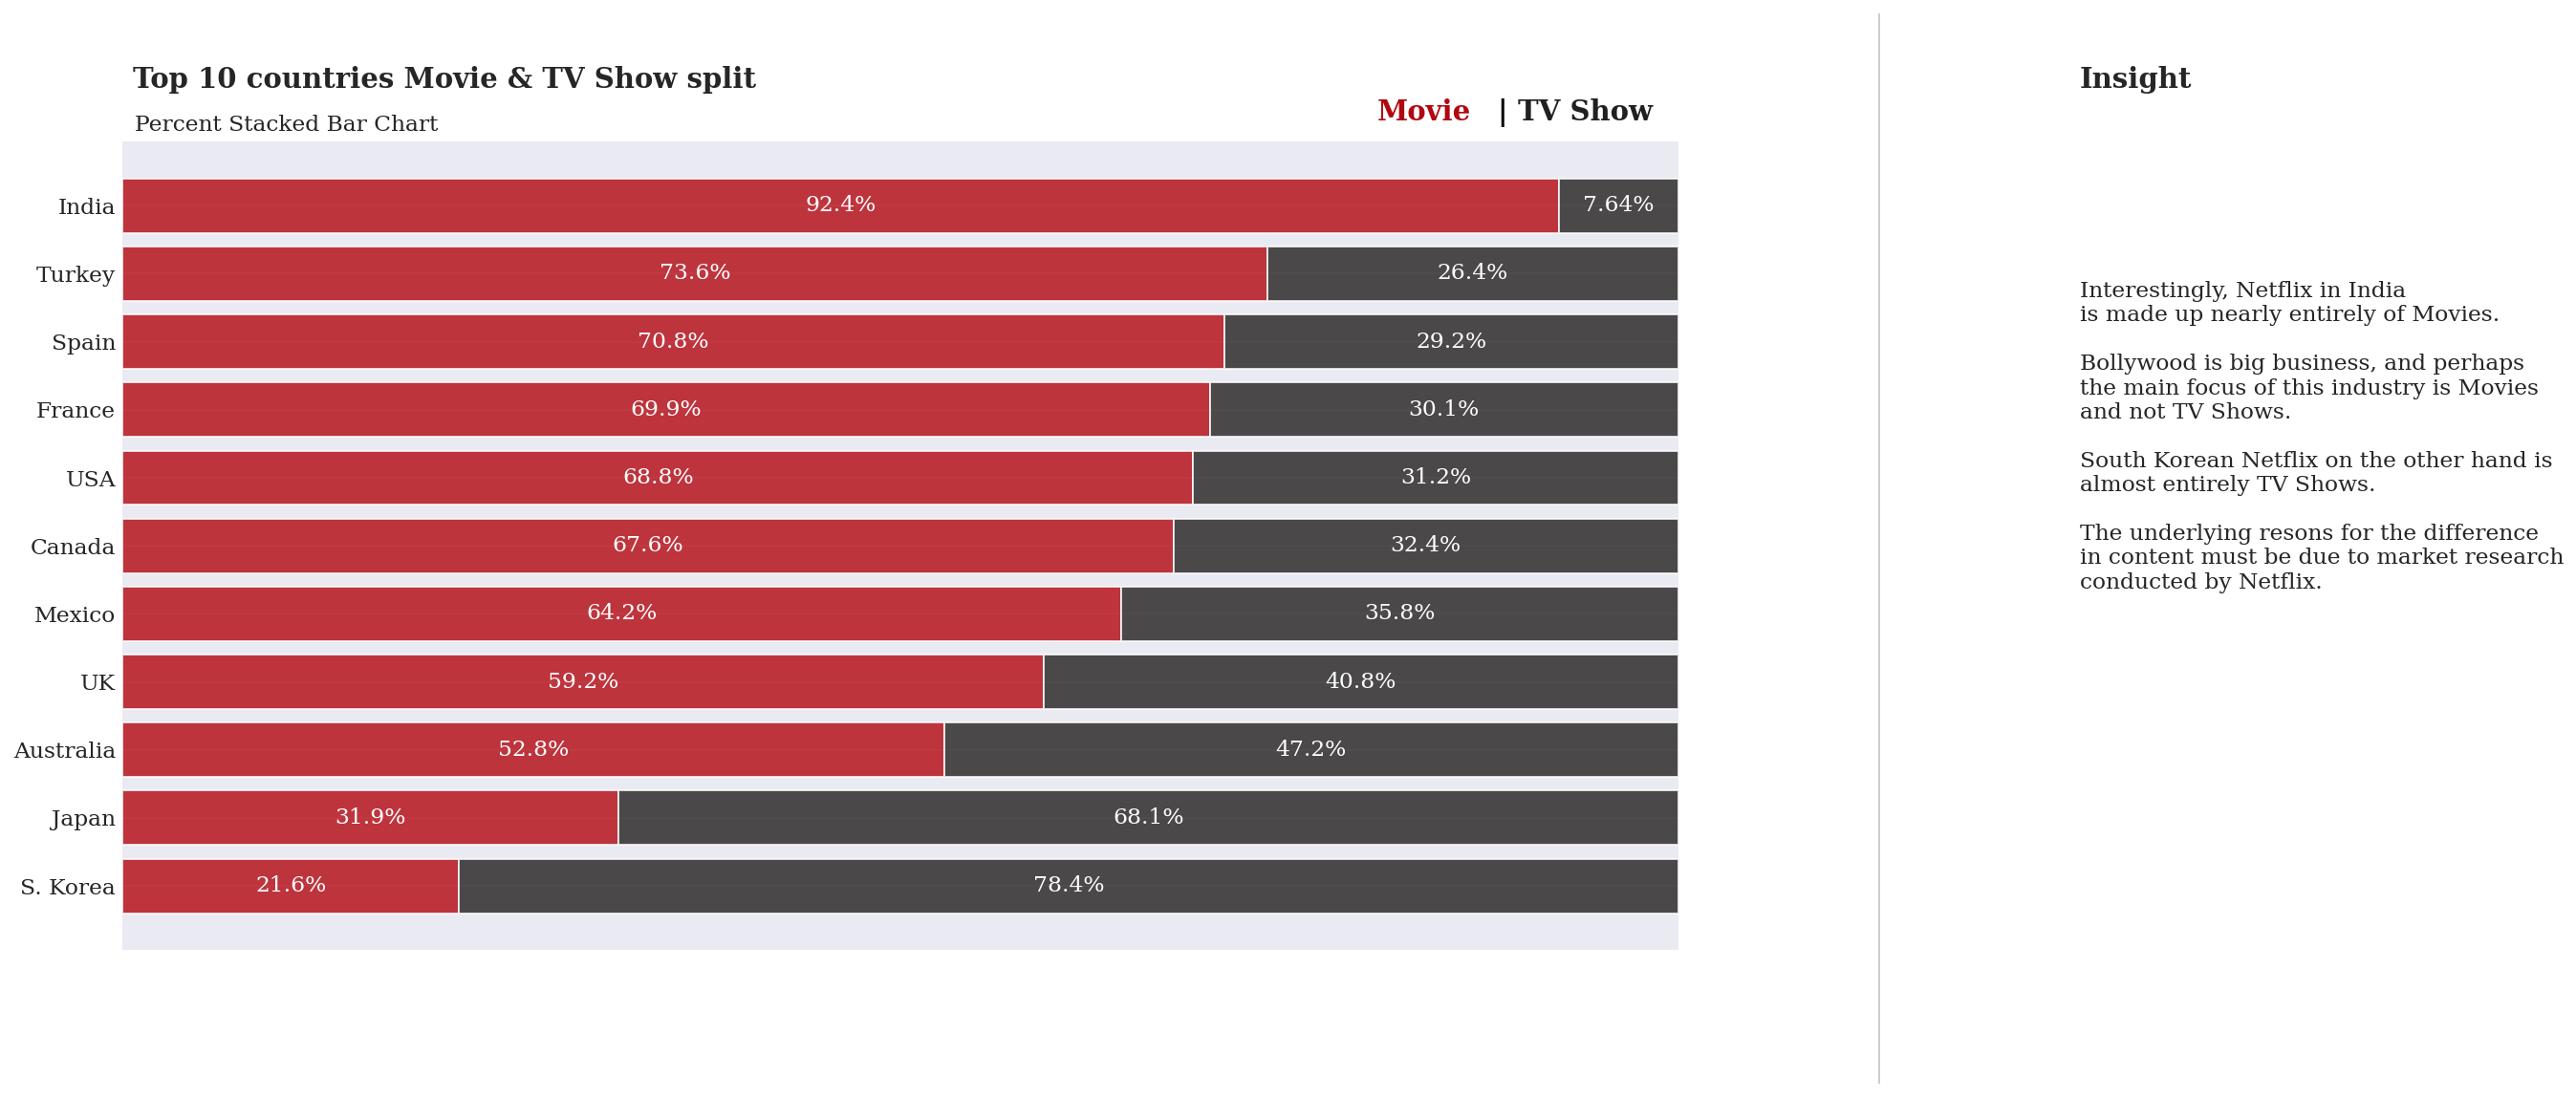

In [158]:
country_order = data['first_country'].value_counts()[:11].index
data_q2q3 = data[['Category', 'first_country']].groupby('first_country')['Category'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]




###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Movie ratings analysis

In [159]:
n_movies=data[data['Category']=='Movie']

In [160]:
n_shows=data[data['Category']=='TV Show']

In [161]:
data['Category'].unique()

array(['TV Show', 'Movie'], dtype=object)

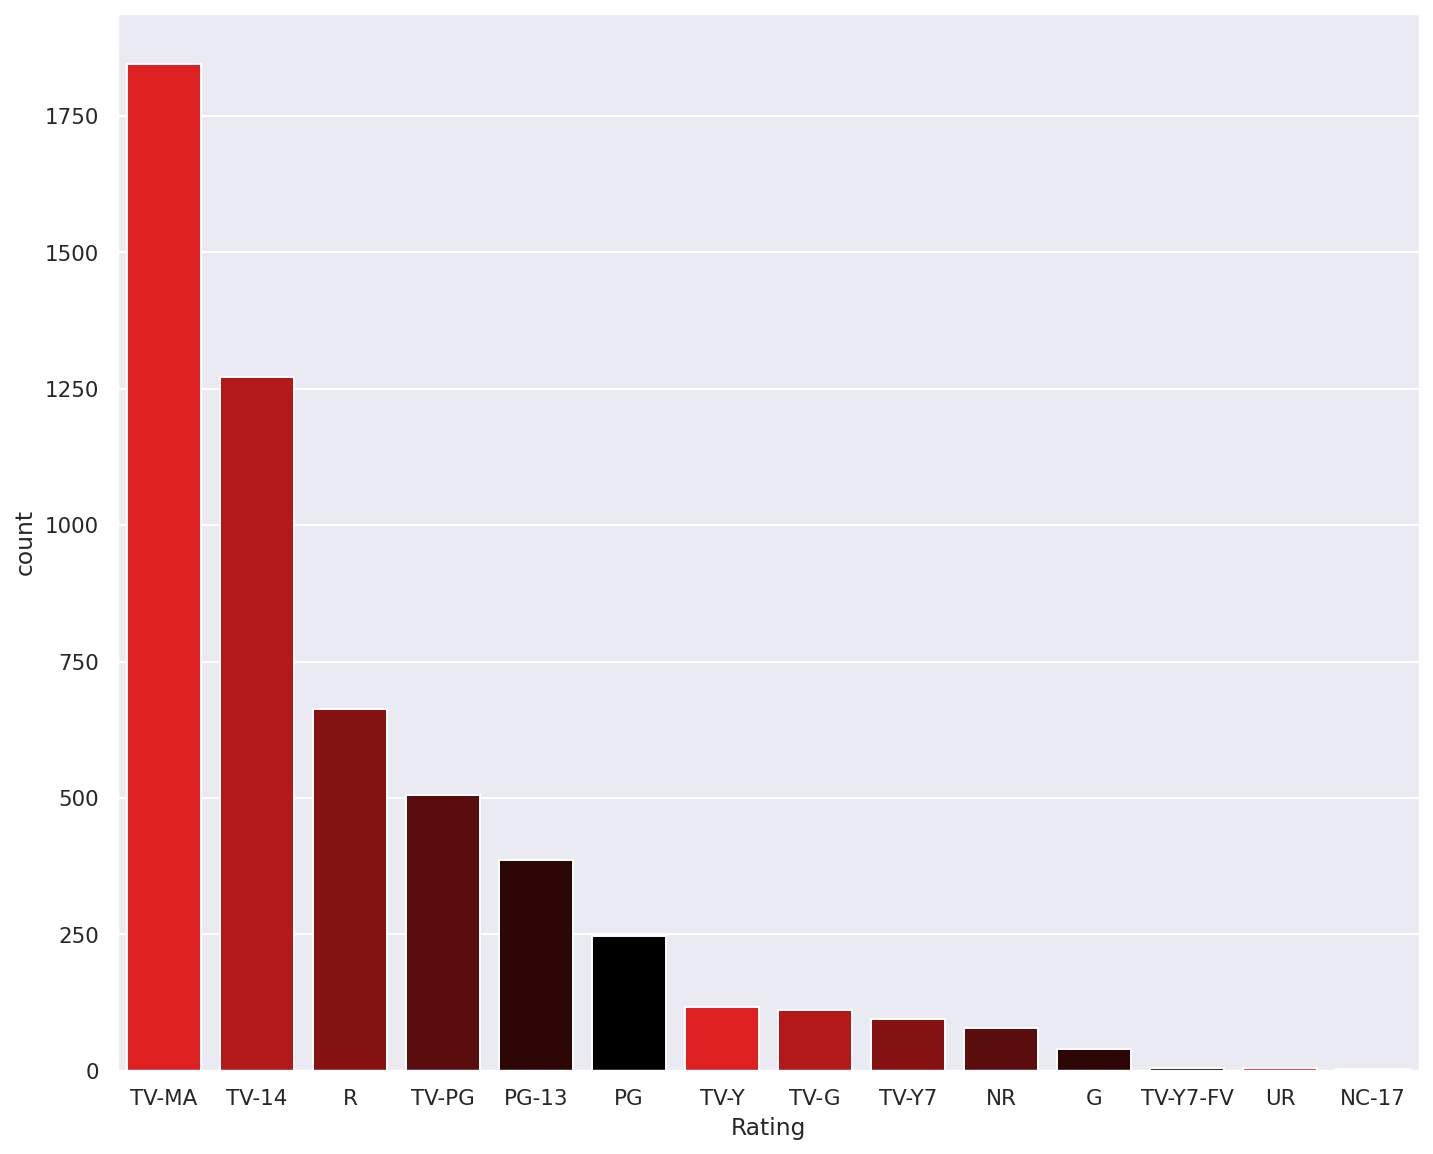

In [162]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="Rating", data=n_movies, palette=sns.blend_palette(['red', 'black']), order=n_movies['Rating'].value_counts().index[0:15])





The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".


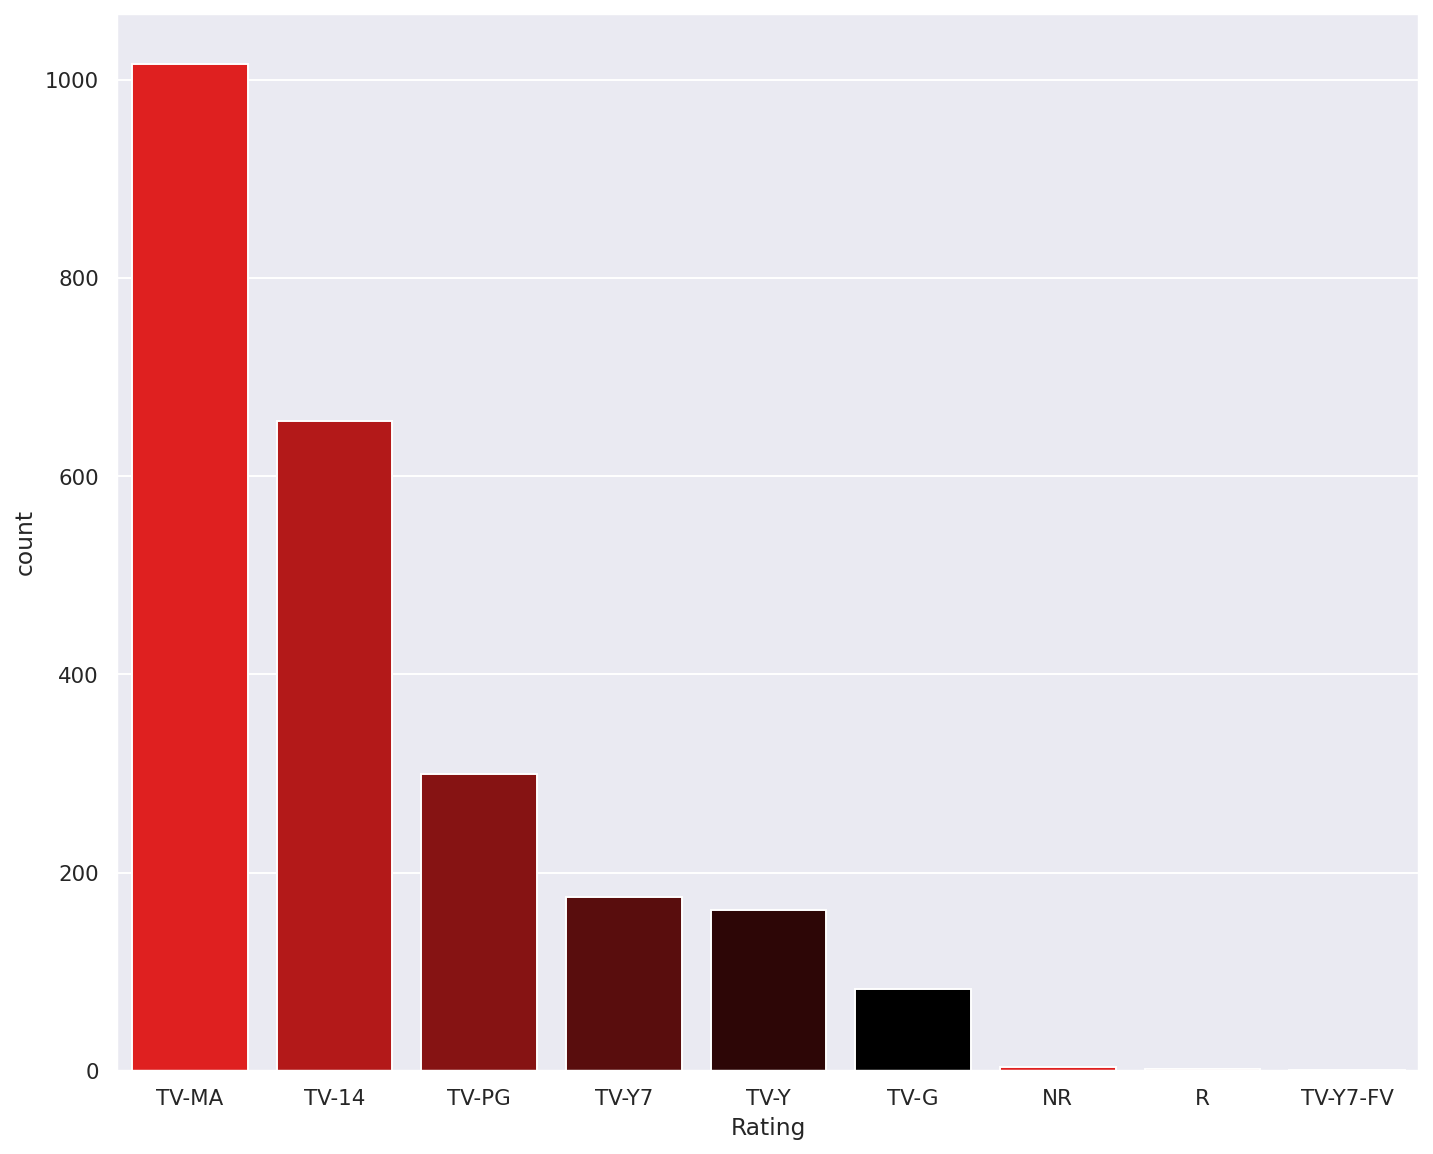

In [164]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="Rating", data=n_shows, palette=sns.blend_palette(['red', 'black']), order=n_shows['Rating'].value_counts().index[0:15])



# Year wise analysis

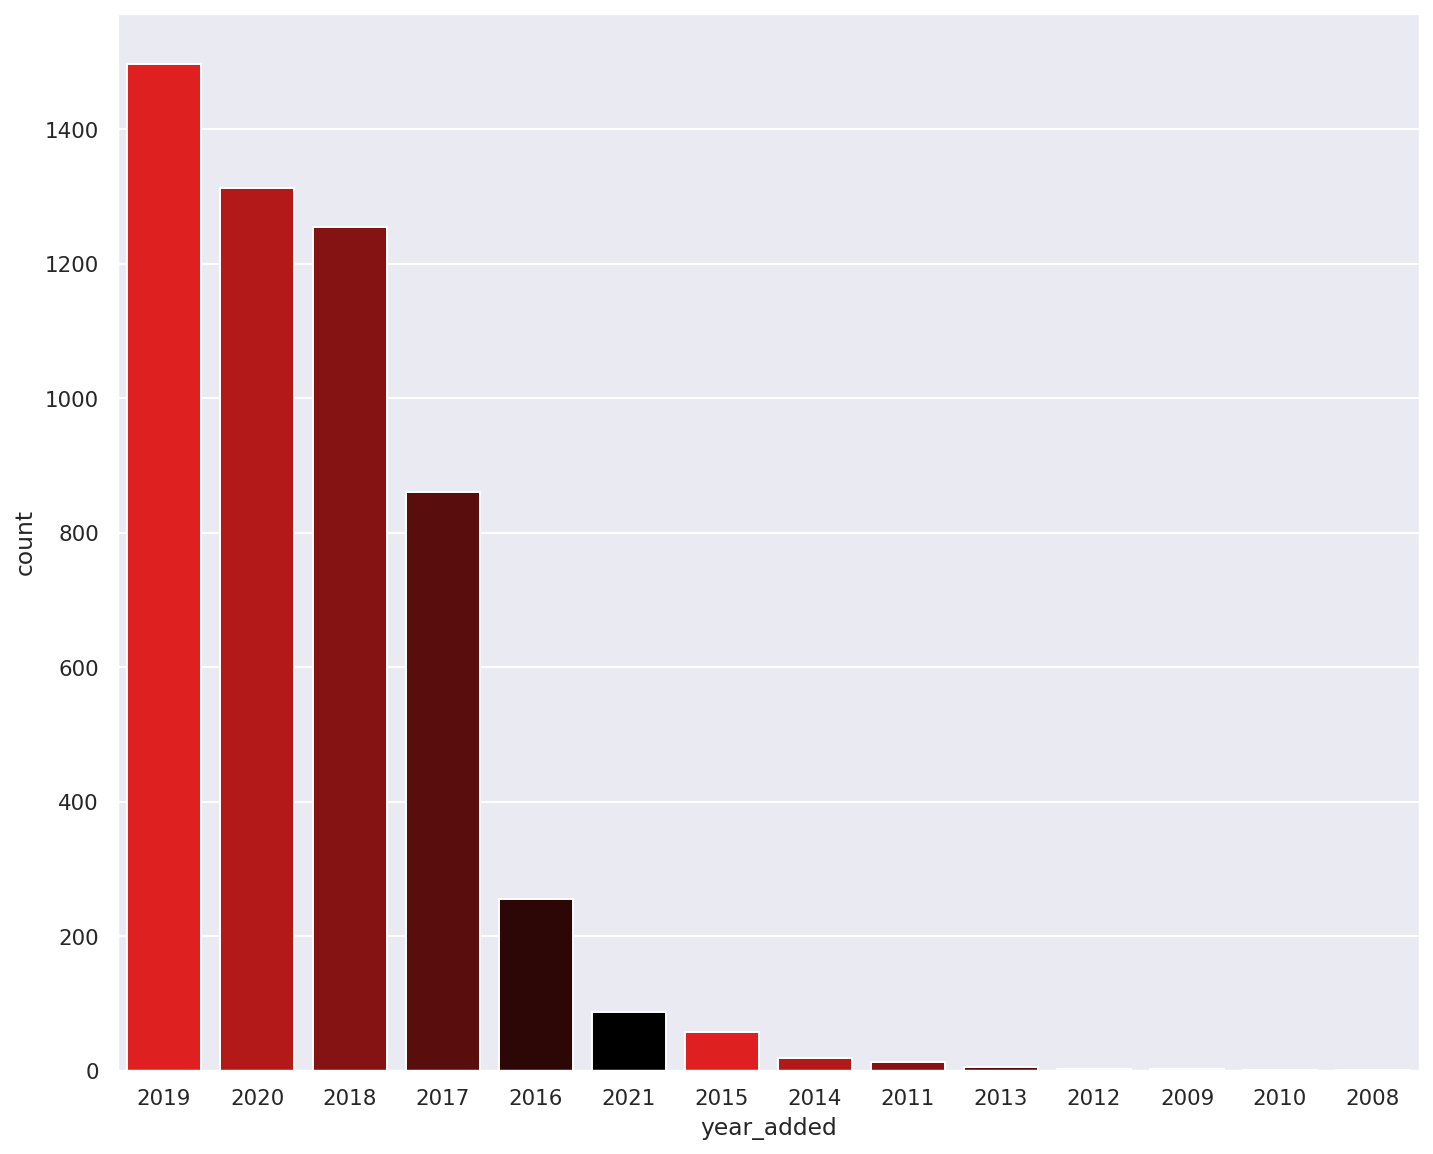

In [166]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="year_added", data=n_movies, palette=sns.blend_palette(['red','black']), order=n_movies['year_added'].value_counts().index[0:15])



So, 2019 was the year when most of the movies were released.

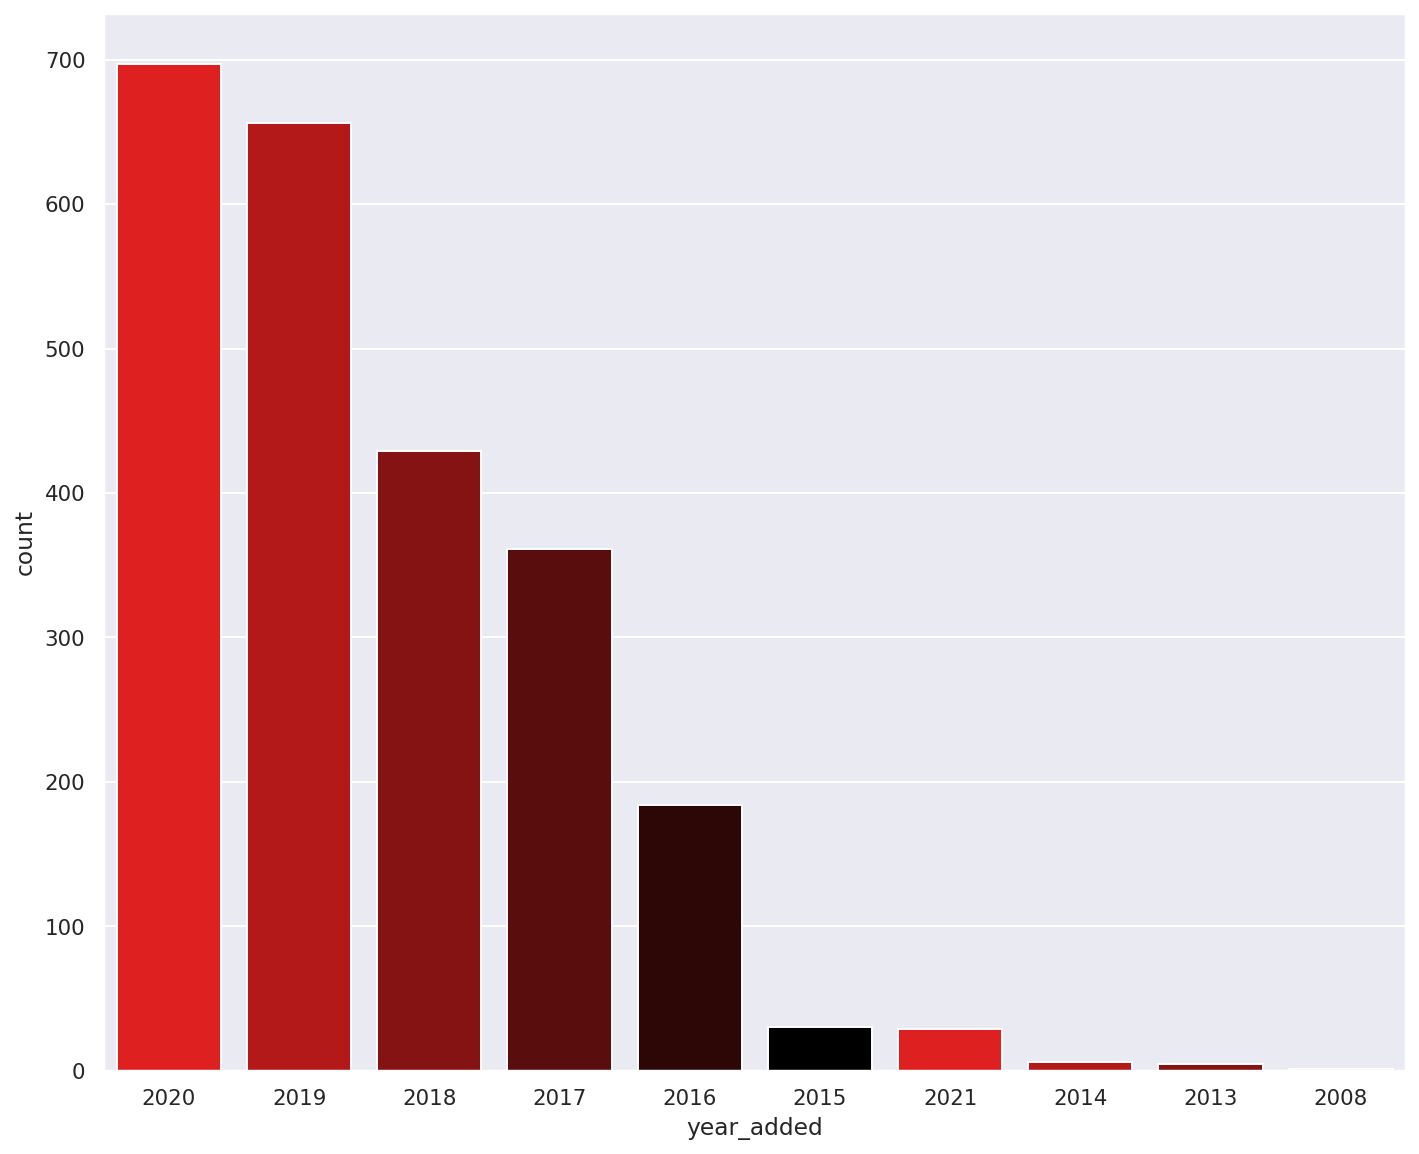

In [167]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="year_added", data=n_shows, palette=sns.blend_palette(['red','black']), order=n_shows['year_added'].value_counts().index[0:15])



So, 2020 was the year when most of the tv shows were released.

In [78]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 



In [79]:


col = "year_added"

vc1 = n_shows[col].value_counts().reset_index() #n_shows['year_added'].value_counts.reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = n_movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#221f1f"))
#trace1 = go.scatter(x=vc1['year_added'],y = vc1['count'])
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
Trace= [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()

In [92]:

col = "year_added"

vc1 = n_shows[col].value_counts().reset_index() #n_shows['year_added'].value_counts.reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = n_movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#221f1f"))
#trace1 = go.scatter(x=vc1['year_added'],y = vc1['count'])
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
Trace= [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()

In [98]:
col = "year_added"

vc1 = data[col].value_counts().reset_index() #n_shows['year_added'].value_counts.reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)


trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
#trace1 = go.scatter(x=vc1['year_added'],y = vc1['count'])

Trace = [trace1]
layout = go.Layout(title="In which year most of the content is added", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()

# Month-by-Month

In [168]:
col = "month_added"

vc1 = n_shows[col].value_counts().reset_index() #n_shows['year_added'].value_counts.reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = n_movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#221f1f"))
#trace1 = go.scatter(x=vc1['year_added'],y = vc1['count'])
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
Trace = [trace1, trace2]
layout = go.Layout(title="Content added by monyh", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()

In [85]:
col = "month_added"

vc1 = n_shows[col].value_counts().reset_index() #n_shows['year_added'].value_counts.reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = n_movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#221f1f"))
#trace1 = go.scatter(x=vc1['year_added'],y = vc1['count'])
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
Trace = [trace1, trace2]
layout = go.Layout(title="Content added by monyh", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()

In which month most of the content is added


In [97]:
col = "month_added"

vc1 = data[col].value_counts().reset_index() #n_shows['year_added'].value_counts.reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)


trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
#trace1 = go.scatter(x=vc1['year_added'],y = vc1['count'])

Trace = [trace1]
layout = go.Layout(title="In which month most of the content is added", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()

In [99]:
data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description',
       'month_added', 'month_name_added', 'year_added', 'count',
       'first_country', 'target_ages', 'genre'],
      dtype='object')

In [118]:
n_India = data[data['Country']=='India']
n_USA = data[data['Country']=='United States']
n_India.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description',
       'month_added', 'month_name_added', 'year_added', 'count',
       'first_country', 'target_ages', 'genre'],
      dtype='object')

In [115]:
n_India.shape

(923, 18)

In [119]:
n_USA.shape
n_USA

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,month_added,month_name_added,year_added,count,first_country,target_ages,genre
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017,1,USA,Teens,"[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020,1,USA,Teens,[Dramas]
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,11,November,2019,1,USA,Adults,[Dramas]
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,10,October,2017,1,USA,Adults,"[Dramas, Thrillers]"
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,3,March,2020,1,USA,Adults,"[Independent Movies, Sci-Fi & Fantasy, Thrillers]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,November,2019,1,USA,Adults,"[Cult Movies, Dramas, Thrillers]"
7779,s7778,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,July,2019,1,USA,Older Kids,"[Kids' TV, Korean TV Shows, TV Comedies]"
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,November,2019,1,USA,Adults,"[Comedies, Horror Movies]"
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,2020,1,USA,Older Kids,"[Children & Family Movies, Comedies]"


In [122]:
col = "year_added"

vc1 = n_India[col].value_counts().reset_index() #n_shows['year_added'].value_counts.reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = n_USA[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="INDIA", marker=dict(color="#b20710"))
#trace1 = go.scatter(x=vc1['year_added'],y = vc1['count'])
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="USA", marker=dict(color="#221f1f"))
Trace= [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()

We know from our work above that Netflix is dominated by the USA & India.
It would also be reasonable to assume that, since Netflix is an American
compnany, Netflix increased content first in the USA, before 
other nations. 

That is exactly what we see here; a slow and then rapid
increase in content for the USA, followed by Netflix 
being launched to the Indian market in 2016.'''

# "Movie Directors from India with most content"

In [127]:
import collections

In [173]:

n_IndianMovies=n_movies[n_movies['Country']=='India']    
    
col = "Director"
categories = ", ".join(n_IndianMovies[col].fillna("")).split(", ")
counter_list = collections.Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#b20710"))

Trace = [trace1]
layout = go.Layout(title="Movie Directors from India with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()

In [174]:
n_IndianShows=n_shows[n_shows['Country']=='India']    
    
col = "Director"
categories = ", ".join(n_IndianShows[col].fillna("")).split(", ")
counter_list = collections.Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#b20710"))

Trace = [trace1]
layout = go.Layout(title="Show Directors from India with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()

In [180]:
n_USAMovies=n_movies[n_movies['Country']=='United States']    
    
col = "Director"
categories = ", ".join(n_USAMovies[col].fillna("")).split(", ")
counter_list = collections.Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#221f1f"))

Trace = [trace1]
layout = go.Layout(title="Movie Directors from USA with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()

In [179]:
n_USAShows=n_shows[n_shows['Country']=='United States']    
    
col = "Director"
categories = ", ".join(n_USAShows[col].fillna("")).split(", ")
counter_list = collections.Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#221f1f"))

Trace = [trace1]
layout = go.Layout(title="Show Directors from USA with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()